In [3]:

# Preprocssing data 
# Make data ready for sentiment and topic modeling 

# Parts of the code is inspired by the article Towards data science: https://towardsdatascience.com/religion-on-twitter-5f7b84062304


In [1]:

# Import stuff :-) 
import os
import tweepy as tw
import pandas as pd
import numpy as np
import re
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
# Gensim
import gensim
from gensim.utils import simple_preprocess
# NLTK
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [11]:
# import data 
#tweets_df = pd.read_csv('tweets_df_3000.csv')
# updated data 150000 tweets version
tweets_df1 = pd.read_csv('tweets_df1_15000.csv')


In [12]:
# drop unnecessary columns
# Also I wont use the username column, so for privacy concerns we should just drop it and also user_description

tweets_df1.drop(['Unnamed: 0', 'user', 'user_description'], axis='columns', inplace=True)


# testing: 
#tweets_df1.head()
#print(tweets_df)
#len(tweets_df1)
tweets_df1.shape
# success! Now we have7 columns and 15000 rows :-)))

(15000, 7)

In [13]:
# DROP DUPLICATES based on text column 
# Should not be necessary as I filtered out retweets in the API search, but just in case
tweets_df1.drop_duplicates(subset=['text'], keep='first',inplace=True)

tweets_df1.shape
# Now I have 14976 tweets (so I acutally only had 24 duplicates, meaning that the filtering in the API worked pretty well!)

(14976, 7)

In [6]:
# Get descriptive stats for the tweets in the dataset
count = tweets_df1['text'].str.split().str.len()
count.index = count.index.astype(str) + ' words: '
count.sort_index(inplace=True)

print("Total number of words: ", count.sum(), "words")
print("Mean number of words per tweet: ", round(count.mean(),2), "words")

tweets_df1["tweet_length"] = tweets_df1["text"].str.len()
print("Total length of the dataset is: ", tweets_df1.tweet_length.sum(), "characters")
print("Mean length of a tweet is: ", round(tweets_df1.tweet_length.mean(),0), "characters")

#OUTPUT FROM OLD DATA (3000 tweets)
# Total number of words:  49925 words
# Mean number of words per tweet:  16.65 words
# Total length of the dataset is:  359522 characters
# Mean length of a tweet is:  120.0 characters

#OUTPUT FROM NEW DATA (15000 tweets)
# Total number of words:  247735 words
# Mean number of words per tweet:  16.54 words
# Total length of the dataset is:  1815678 characters
# Mean length of a tweet is:  121.0 characters

# Mean length of 121 characters seems reasonable

Total number of words:  247735 words
Mean number of words per tweet:  16.54 words
Total length of the dataset is:  1815678 characters
Mean length of a tweet is:  121.0 characters


In [14]:
# Now to the preprocessing part where we make the text ready for processing 
# Next steps involve: 
#  - Remove: 
#    - username
#    - uppercase characters (into lowercase)
#    - links
#    - "pseudo retweets"
#    - query 
#    - MAYBE: remove other words that are too dominating in the dataset, e.g. vaccine ???
#    - remove all non-alphabet characters, e.g. punctuations, numbers, question marks, etc. 
#    - Remove all words <= 2 characters 
#  - Tokenization 
#  - Removing stopwords
#  - Removing short tweets (below 3 tokens) 
#  - add column of the updated tokenized tweets in string format




# ... 

# Remove usernames (mentions) from tweets/text:

def remove_usernames(tweet, type1, type2):
    r = re.findall(type1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
  
    r = re.findall(type2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

# add new column with altered tweets called tidy_text:
tweets_df1['tidy_text'] = np.vectorize(remove_usernames)(tweets_df1['text'], "@ [\w]*", "@[\w]*")

# LINE BELOW ADDED AFTER SYNOPSIS HAND IN
# Add new column with less_preprocessed_text
tweets_df1['less_prep_text'] = np.vectorize(remove_usernames)(tweets_df1['text'], "@ [\w]*", "@[\w]*")

In [15]:
# Normalize text by turning tweeet text into lowercase characters 
tweets_df1['tidy_text'] = tweets_df1['tidy_text'].str.lower()

In [16]:
# Remove links from tweet text
def remove_them_links(tweet):
    tweet_no_link = re.sub(r"http\S+", "", tweet)
    return tweet_no_link
tweets_df1['tidy_text'] = np.vectorize(remove_them_links)(tweets_df1['tidy_text'])

# LINE BELOW ADDED AFTER SYNOPSIS HAND IN
tweets_df1['less_prep_text'] = np.vectorize(remove_them_links)(tweets_df1['less_prep_text'])

# check outcome
# print(tweets_df['tidy_text'])

In [17]:
# After manual inspection of the data I can see that there is a number of instances where the API search has returned tweets that are "almost" retweets - that is, tweets that have almost identical text with exception of an extra added "breaking" or only differ in the link. 
# Because I have chosen to exclude retweets, I also wish to remove these "pseudo retweets". I will only remove tweets in instances where there are obviously many of these "pseudo retweets" as I assume the volume of the data will take care of instances where there is a few of these very similar tweets that I might not cacth. 

# Making copy of dataframe to test removing "pseudo retweets"
tweets_df2 = tweets_df1
#tweets_df2.head()
tweets_df2.shape

(14976, 9)

In [18]:
# Remove recurring tweets/rows

# Outdated - from 3000 tweet dataset
#tweets_df1 = tweets_df.drop(tweets_df.index[[63, 64, 65, 66, 67]],inplace=False)
#tweets_df.drop(tweets_df.index[[62, 63, 64, 65, 66]],inplace=True)
#tweets_df.reset_index(drop=True, inplace=True

#tweets_df2.drop(tweets_df2.index[[51, 52, 58, 59, 60, 61, 62, 63, 64, 65, 66, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 268, 269, 278, 279, 280, 281, 315, 316, 317, 318, 319, 332, 333, 334, 335, 346, 347, 348, 361, 362, 363, 366, 367, 422, 428, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 2155, 2156, 2157, 3478, 3479, 3480, 3481, 3482, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3511, 3512, 3528, 3529, 3530, 4324, 4325, 4326, 4327, 4328, 4329, 4330, 4331, 4332, 4333, 4334, 4335, 4339, 4340, 4341, 4342, 4343, 4554, 4555, 4556, 4557, 4558, 4578, 4579, 4580, 4784, 4785, 4787, 4788, 4789, 4790, 4792, 4793, 4794, 4795, 4797, 4798, 4799, 4800, 4802, 4803, 4805, 4806, 4807, 4843, 4844, 4845, 4846, 4847, 4848, 4849, 4850, 5395, 5396, 5397, 5398, 5623, 5624, 5625, 5626, 5627, 5628, 5629, 6057, 6058, 6059, 6060, 6062, 6063, 6064, 6065, 6132, 6133, 6134, 6135, 6136, 6138, 6139, 6140, 6141, 6296, 6297, 6298, 6299, 6300, 6301, 7845, 7846, 7847, 7870, 7871, 7872, 8111, 8112, 8113, 8114, 9580, 9581, 9582, 9623, 9624, 9626, 9627, 9633, 9635, 9636, 9644, 9645, 9646, 9650, 9652, 9653, 9654, 9757, 9758, 9761, 9762, 9763, 9764, 9766, 9767, 9768, 9769, 9770, 9771, 9772, 9773, 9774, 9775, 9776, 9787, 9788, 9789, 9790, 9791, 9792, 9793, 9795, 9796, 9797, 9799, 9800, 9801, 9802, 9803, 9804, 9805, 9820, 9821, 9822, 9823, 10558, 10559, 10560, 10561, 10562, 10585, 10586, 10587, 10598, 10599, 10600, 10610, 10611, 10612, 10625, 10626, 10627, 10628, 10629, 10630, 10631, 10632, 10633, 10634, 10635, 10636, 10637, 10638, 10639, 10640, 10641, 10642, 10643, 10644, 10645, 10647, 10648, 10649, 11027, 11028, 11029, 11030, 11433, 11434, 11441, 11442, 11449, 11450, 11766, 11767, 11768, 11783, 11784, 11785, 11838, 11839, 11843, 11844, 11849, 11850, 11852, 11853, 11854, 11855, 11857, 11872, 11873, 11874, 11875, 12036, 12037, 12038, 12039, 12040, 12047, 12048, 13570, 13571, 13603, 13604, 13605]],inplace=True)
#tweets_df2.reset_index(drop=True, inplace=True)
tweets_df2.shape
# (14655, 9)

(14655, 9)

In [49]:
# Save for backup
tweets_df2.to_csv('tweets_df2_v1.csv', header=True, mode='a') # minus username and user description
#print(tweets_df2)

#tweets_df3 = pd.read_csv('tweets_df2_v1.csv')


In [19]:
# Remove query AKA "moderna"
def remove_q_word(tweet):
    tweet_no_q = re.sub(r"moderna", "", tweet)
    return tweet_no_q
tweets_df2['tidy_text'] = np.vectorize(remove_q_word)(tweets_df2['tidy_text'])
# print(tweets_df['tidy_text'])

# LINE BELOW ADDED AFTER SYNOPSIS HAND IN
tweets_df2['less_prep_text'] = np.vectorize(remove_q_word)(tweets_df2['less_prep_text'])

In [20]:
# SKIP - NOT DOING THIS 
# YES - do this for novaccine version 

# After inspecting the data more and doing topic analysis it turned out that some words were crazy dominating - so much that it dominated everything else, therefore I will filter some of the most predominant words out, e.g. "vaccine" 
# OVERVEJ OGSÅ AT FJERNE "covid" - indtil videre fjerner jeg kun vaccine
def remove_qq_word(tweet):
    tweet_no_qq = re.sub(r"vaccine", "", tweet)
    return tweet_no_qq
tweets_df2['tidy_text'] = np.vectorize(remove_qq_word)(tweets_df2['tidy_text'])
# print(tweets_df['tidy_text'])

# LINE BELOW ADDED AFTER SYNOPSIS HAND IN
tweets_df2['less_prep_text'] = np.vectorize(remove_qq_word)(tweets_df2['less_prep_text'])

In [21]:
# SKIP - NOT DOING THIS 
# YES - do this for novaccine version
def remove_qqq_word(tweet):
    tweet_no_qqq = re.sub(r"vaccines", "", tweet)
    return tweet_no_qqq
tweets_df2['tidy_text'] = np.vectorize(remove_qqq_word)(tweets_df2['tidy_text'])
# print(tweets_df['tidy_text'])

# LINE BELOW ADDED AFTER SYNOPSIS HAND IN
tweets_df2['less_prep_text'] = np.vectorize(remove_qqq_word)(tweets_df2['less_prep_text'])

In [22]:
# SKIP - NOT DOING THIS 
# YES - do this for novaccine + no covid version
def remove_qqqq_word(tweet):
    tweet_no_qqqq = re.sub(r"covid", "", tweet)
    return tweet_no_qqqq
tweets_df2['tidy_text'] = np.vectorize(remove_qqqq_word)(tweets_df2['tidy_text'])
# print(tweets_df['tidy_text'])

# LINE BELOW ADDED AFTER SYNOPSIS HAND IN
tweets_df2['less_prep_text'] = np.vectorize(remove_qqqq_word)(tweets_df2['less_prep_text'])

In [23]:
# SKIP - NOT DOING THIS 
# YES - do this for the novaccine + no covid + no pfizer
def remove_5q_word(tweet):
    tweet_no_5q = re.sub(r"pfizer", "", tweet)
    return tweet_no_5q
tweets_df2['tidy_text'] = np.vectorize(remove_5q_word)(tweets_df2['tidy_text'])
# print(tweets_df['tidy_text'])

# LINE BELOW ADDED AFTER SYNOPSIS HAND IN
tweets_df2['less_prep_text'] = np.vectorize(remove_5q_word)(tweets_df2['less_prep_text'])

In [ ]:
# remove mroe words 

#dose            1368
#receive         1240
#first            941
#approve          663
#week             608
#begin            575
#shipment         563
#today            535


In [24]:
# get overview of most frequent words 
frequentw_list1 = pd.Series(' '.join(tweets_df2.tidy_text).split()).value_counts()[:50]
#tweets_df.head()
frequentw_list1

the            10982
to              5064
of              4418
and             3862
in              3581
a               2576
-19             2476
is              2459
for             2333
i               1638
on              1599
that            1368
are             1348
you             1297
this            1267
s               1237
.               1219
doses           1202
first           1185
has             1124
be              1121
will            1112
have            1069
it              1066
,               1059
as               966
's               960
with             953
health           845
from             844
not              758
get              755
at               753
#                747
we               707
was              697
’s               673
by               672
coronavirus      670
they             661
more             657
trump            644
he               626
if               576
or               551
but              549
about            548
so           

In [25]:
# Remove numbers, punctuations, and other non-alphabetical characters
tweets_df2['tidy_text'] = tweets_df2['tidy_text'].str.replace("[^a-zA-Z]", " ") # remove everything that is non-alphabet characters

In [26]:
# Remove all words <= 2 characters 
tweets_df2['tidy_text'] = tweets_df2['tidy_text'].apply(lambda x:' '.join([w for w in x.split() if len(w)>2]))

In [27]:
# Now it's time for tokenization
# splits text by whitespaces and saves every word individual tokens. 
# we tokenize by means of simple_preprocess from the gensim library

def tokenize(tweet):
    for word in tweet:
        yield(gensim.utils.simple_preprocess(str(word), deacc=True))  
tweets_df2['tidy_text_tokens'] = list(tokenize(tweets_df2['tidy_text']))

In [28]:
# Remove stopwords
# After tokenizing the text, we can remove stopwords using the NLTK pre-defined list of stopwords
# Prepare list of english stopwords
stop_words = stopwords.words('english')
# but I also want to extend the stopwords list to include other undesired words: 
stop_words.extend(['from', 'https', 'twitter', 'pic','twitt', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l','m','n','o','p','q','r','s','t', 'u', 'v', 'w', 'x', 'y', 'z', "about", "across", "after", "all", "also", "an", "and", "another", "added", "any", "are", "as", "at", "basically", "be", "because", 'become', "been", "before", "being", "between","both", "but", "by", "came","can","come","could","did","do","does","each","else","every","either","especially", "for","from","get","given","gets", 'give','gives',"got","goes","had","has","have","he","her","here","him","himself","his","how","if","in","into","is","it","its", "just","lands","like","make","making", "made", "many","may","me","might","more","most","much","must","my", "provides", "perhaps", "no","now","of","on","only","or","other", "our","out","over","re","said","same","see","should","since","so","some","still","such", "seeing", "saw", "take","than","that","the","their","them","then","there","these","they","this","those","through","to","too", "under","up","use","using","used", "very","want","was","way","we","well","were","what","when","where","which","while","whilst", "who","will","with","would","you","your", 'etc', 'via', 'eg', "one", "two","say", "day", "amp", "&amp"]) 
# REMOVE STOPWORDS
def remove_stopwords(tweets):
    return [[word for word in simple_preprocess(str(tweet)) if word not in stop_words] for tweet in tweets]
tweets_df2['tokens_no_stopwords'] = remove_stopwords(tweets_df2['tidy_text_tokens'])

In [29]:
tweets_df2.shape # (14655, 12)
# second time - novaccine version said (14655, 11) I think its because I did it with the length thingy first time so should be no prboblem
# third time - (14655, 11)

(14655, 11)

In [30]:
# Remove short tweets 
# Remove tweets that only has two or less (AKA below 3) tokens. This is to ensure that there is engough information to work with in the topic modeling and sentiment analyis. 
# Remove tweets with less than 3 tokens: 
tweets_df2['length'] = tweets_df2['tokens_no_stopwords'].apply(len)
tweets_df2 = tweets_df2.drop(tweets_df2[tweets_df2['length']<3].index)
tweets_df2 = tweets_df2.drop(['length'], axis=1)
tweets_df2.reset_index(drop=True, inplace=True)
tweets_df2.shape
# (13718, 11) second - minus q + vacc
# (13583, 11) third - minus q + vacc + covid
# (13435, 10) fourth - minus q + vacc + covid + pfizer

(13435, 11)

In [31]:
# Add column that is a string of the updated tokenized tweets (this might also make the whole wordcloud situation more easy to handle).
tweets_df2['no_stopwords_string'] = [' '.join(map(str, l)) for l in tweets_df2['tokens_no_stopwords']]
tweets_df2.shape
tweets_df2.head()


,text,location,statuses_count,followers_count,friends_count,listed_count,favourites_count,tidy_text,less_prep_text,tidy_text_tokens,tokens_no_stopwords,no_stopwords_string
0,The Future of Vaccines\nhttps://t.co/GI23fycj1...,Earth,11485,774,3240,2,1107,the future never before have billions people b...,The Future of Vaccines\n\nNever before have bi...,"[the, future, never, before, have, billions, p...","[future, never, billions, people, pressured, s...",future never billions people pressured submit
1,@AndrewButters91 *66 million (Moderna requires...,"Toronto, ON",10,110,732,1,9,million requires two doses,*66 million (Moderna requires two doses),"[million, requires, two, doses]","[million, requires, doses]",million requires doses
2,The immunization task force can likely deliver...,"Mississauga, Canada",280,225,675,3,26,the immunization task force can likely deliver...,The immunization task force can likely deliver...,"[the, immunization, task, force, can, likely, ...","[immunization, task, force, likely, deliver, s...",immunization task force likely deliver shots s...
3,"As I was writing this, Health Canada said it a...","New York, NY",9050,2826,4013,185,9650,was writing this health canada said authorized...,"As I was writing this, Health Canada said it a...","[was, writing, this, health, canada, said, aut...","[writing, health, canada, authorized]",writing health canada authorized
4,BREAKING: Health Canada authorizes Moderna's C...,"North Bay, Ontario",36196,4825,493,35,4,breaking health canada authorizes,BREAKING: Health Canada authorizes Moderna's C...,"[breaking, health, canada, authorizes]","[breaking, health, canada, authorizes]",breaking health canada authorizes


In [32]:
# I AM HERE NOW WORKING WITH DF2 - HAVE NOT REMOVED VACCCINE; COVID; PFIZER

# save data to csv file 
#tweets_df2.to_csv('prepped_tweets_minus_query.csv', header=True, mode='a')
#tweets_df2.shape # (13889,13)

# I AM HERE NOW WORKING WITH DF2 - HAVE NOT REMOVED COVID; PFIZER 

# save data to csv file 
#tweets_df2.to_csv('prepped_tweets_minus_query_vaccine_vaccines.csv', header=True, mode='a')
#tweets_df2.shape # (13718, 12)

# I AM HERE NOW WORKING WITH DF2 - HAVE NOT REMOVED PFIZER

# save data to csv file 
#tweets_df2.to_csv('prepped_tweets_minus_query_vaccine_vaccines_covid.csv', header=True, mode='a')
#tweets_df2.shape # (13583, 12)

# I AM HERE NOW WORKING WITH DF2 - HAVE REMOVED ALLES

# save data to csv file 
#tweets_df2.to_csv('prepped_tweets_minus_query_vaccine_vaccines_covid_pfizer.csv', header=True, mode='a')
#tweets_df2.shape # (13435, 11) - less column bc I skipped tweet length column 

# LINE BELOW ADDED AFTER SYNOPSIS HAND IN 
# save data to csv file 
tweets_df2.to_csv('updated_prepped_tweets_minus_query_vaccine_vaccines_covid_pfizer.csv', header=True, mode='a')
tweets_df2.shape # (13435, 12) - less column bc I skipped tweet length column 

(13435, 12)

In [141]:
# get overview of most frequent words after pre-proecssing 
frequentw_list2 = pd.Series(' '.join(tweets_df2.no_stopwords_string).split()).value_counts()[:50]
#tweets_df.head()
frequentw_list2

# Top 10 from preprocessed data with removed query only (no_stopwords_string):
# vaccine          7565
# covid            4049
# pfizer           2984
# vaccines         1624
# doses            1269
# first            1253
# health            903
# coronavirus       788
# trump             763
# fda               647

# Top 10 from preprocessed data with removed query + vaccine + vaccines (no_stopwords_string):
#covid            4122
#pfizer           2960
#doses            1268
#first            1250
#health            903
#coronavirus       787
#trump             763
#fda               645
#week              602
#new               588

# Top 10 from preprocessed data with removed query + vaccine + vaccines + covid (no_stopwords_string):
#pfizer           2952
#doses            1265
#first            1250
#health            903
#coronavirus       786
#trump             763
#fda               642
#week              602
#new               588
#today             536

# Top 10 from preprocessed data with removed query + vaccine + vaccines + covid + pfizer (no_stopwords_string):
#doses            1262
#first            1250
#health            903
#coronavirus       783
#trump             761
#fda               642
#week              602
#new               588
#today             536
#receive           519

doses            1262
first            1250
health            903
coronavirus       783
trump             761
fda               642
week              602
new               588
today             536
receive           519
stock             490
fauci             484
received          473
people            442
approved          438
second            424
news              418
distribution      392
know              388
emergency         382
canada            368
side              362
mrna              356
says              334
monday            333
workers           329
shipments         328
shipment          300
getting           288
biontech          275
county            270
million           265
shots             258
states            256
live              243
expected          242
dose              233
good              230
authorization     229
care              220
begin             219
state             216
arrive            214
next              211
authorized        204
hospitals 

In [38]:
# THAT WAS THE PREPROCESSING PART FOR NOW! 

# Post preprocessing descriptive stats: 
# Get descriptive stats for the tweets in the dataset after preprocessing
count = tweets_df2['no_stopwords_string'].str.split().str.len()
count.index = count.index.astype(str) + ' words: '
count.sort_index(inplace=True)

print("Total number of words: ", count.sum(), "words")
print("Mean number of words per tweet: ", round(count.mean(),2), "words")

tweets_df2["preprocessed_tweet_length"] = tweets_df2["no_stopwords_string"].str.len()
print("Total length of the dataset is: ", tweets_df2.preprocessed_tweet_length.sum(), "characters")
print("Mean length of a tweet is: ", round(tweets_df2.preprocessed_tweet_length.mean(),0), "characters")

#OUTPUT FROM RAW DATA (15000 tweets)
# Total number of words:  247735 words
# Mean number of words per tweet:  16.54 words
# Total length of the dataset is:  1815678 characters
# Mean length of a tweet is:  121.0 characters

# OUTPUT FROM PREPROCESSED DATA (13889 tweets)
# Total number of words:  106024 words
# Mean number of words per tweet:  7.63 words
# Total length of the dataset is:  765799 characters
# Mean length of a tweet is:  55.0 characters


Total number of words:  106024 words
Mean number of words per tweet:  7.63 words
Total length of the dataset is:  765799 characters
Mean length of a tweet is:  55.0 characters


In [ ]:
# CREATE WORDCLOUD - VISUALIZATION
# Visualize most 100 frequently occuring words of the dataset with a wordcloud 

In [33]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


# I AM HERE NOW : DO NEW WORD CLOUD

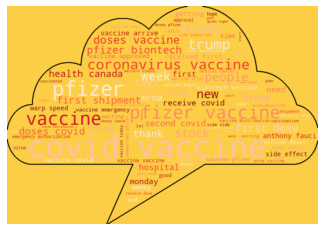

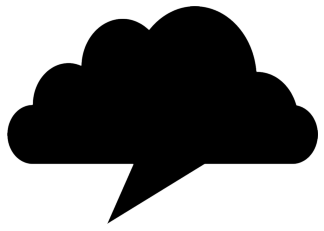

In [41]:
# Note to self: 
# Make pretty cloud, save data as pickle under new name. After this, download this datafile in the LDA file. 

# read mask image
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
cloud_mask = np.array(Image.open(path.join(d, "speech_cloud.png")))

cloud = WordCloud(background_color = "#FCCE45", max_words = 100, mask = cloud_mask, contour_width=3, contour_color='black', min_font_size=8, colormap="Reds").generate(' '.join(tweets_df2['no_stopwords_string']))

# floteste farve i wordcloud på sort baggrund var colormap = "PiYG"

#show wordcloud with mask
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(cloud_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [384]:
# save wordcloud as png
cloud.to_file(path.join(d, "nopfizer_wordcloud5.png"))
# so far no 3,5,6,9 are the best I think

In [34]:
# Lastly we save the pre-processed dataframe as a pickle, which is then used for Topic Modeling phase.

# Data minus query 
# tweets_df2.to_pickle('prepped_tweets_minus_query.pkl')

# Data minus query, vaccine, vaccines
# tweets_df2.to_pickle('prepped_tweets_minus_query_vaccine_vaccines.pkl')

# Data minus query, vaccine, vaccines, covid
# tweets_df2.to_pickle('prepped_tweets_minus_query_vaccine_vaccines_covid.pkl')

# Data minus query, vaccine, vaccines, covid, pfizer
#tweets_df2.to_pickle('prepped_tweets_minus_query_vaccine_vaccines_covid_pfizer.pkl')

# LINE BELOW ADDED AFTER SYNOPSIS HAND IN
# Updated data (with less preprocesssed column) 
# (Data minus query, vaccine, vaccines, covid, pfizer)
tweets_df2.to_pickle('updated_prepped_tweets_minus_query_vaccine_vaccines_covid_pfizer.pkl')
